In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
df=pd.read_csv("../input/water-quality/waterQuality1.csv")
df.head()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1


In [3]:
df.shape

(7999, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7999 non-null   object 
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uraniu

In [5]:
missing_value = ['#NUM!', np.nan]
df=pd.read_csv("../input/water-quality/waterQuality1.csv", na_values = missing_value)
df.isnull().sum()
#df['ammonia']=df['ammonia'].fillna(df.groupby(['is_safe'])['ammonia'].transform('mean'))
#df.isna().sum()

aluminium      0
ammonia        3
arsenic        0
barium         0
cadmium        0
chloramine     0
chromium       0
copper         0
flouride       0
bacteria       0
viruses        0
lead           0
nitrates       0
nitrites       0
mercury        0
perchlorate    0
radium         0
selenium       0
silver         0
uranium        0
is_safe        3
dtype: int64

In [6]:
df.dropna( subset=['ammonia', 'is_safe'], axis=0, inplace=True)

In [7]:
df.isnull().sum()

aluminium      0
ammonia        0
arsenic        0
barium         0
cadmium        0
chloramine     0
chromium       0
copper         0
flouride       0
bacteria       0
viruses        0
lead           0
nitrates       0
nitrites       0
mercury        0
perchlorate    0
radium         0
selenium       0
silver         0
uranium        0
is_safe        0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.describe()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
count,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,...,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000
mean,0.666396,14.278212,0.161477,1.567928,0.042803,2.177589,0.247300,0.805940,0.771646,0.319714,...,0.099431,9.819250,1.329846,0.005193,16.465266,2.920106,0.049684,0.147811,0.044672,0.114057
std,1.265323,8.878930,0.252632,1.216227,0.036049,2.567210,0.270663,0.653595,0.435423,0.329497,...,0.058169,5.541977,0.573271,0.002967,17.688827,2.322805,0.028773,0.143569,0.026906,0.317900
min,0.000000,-0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.040000,6.577500,0.030000,0.560000,0.008000,0.100000,0.050000,0.090000,0.407500,0.000000,...,0.048000,5.000000,1.000000,0.003000,2.170000,0.820000,0.020000,0.040000,0.020000,0.000000
50%,0.070000,14.130000,0.050000,1.190000,0.040000,0.530000,0.090000,0.750000,0.770000,0.220000,...,0.102000,9.930000,1.420000,0.005000,7.745000,2.410000,0.050000,0.080000,0.050000,0.000000
75%,0.280000,22.132500,0.100000,2.482500,0.070000,4.240000,0.440000,1.390000,1.160000,0.610000,...,0.151000,14.610000,1.760000,0.008000,29.487500,4.670000,0.070000,0.240000,0.070000,0.000000
max,5.050000,29.840000,1.050000,4.940000,0.130000,8.680000,0.900000,2.000000,1.500000,1.000000,...,0.200000,19.830000,2.930000,0.010000,60.010000,7.990000,0.100000,0.500000,0.090000,1.000000


In [10]:
df.corr()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
aluminium,1.000000,0.067369,0.225725,0.294091,-0.099902,0.369221,0.353134,0.168569,-0.009877,-0.078324,...,0.020957,-0.003851,0.237439,-0.003129,0.362986,0.243396,-0.003651,0.334923,0.014723,0.333974
ammonia,0.067369,1.000000,0.046783,0.070099,-0.006422,0.104775,0.124782,0.015953,-0.028221,0.063603,...,-0.037065,0.006483,-0.063309,0.020884,0.090928,0.050401,0.029897,0.075547,0.014635,-0.022919
arsenic,0.225725,0.046783,1.000000,0.362925,0.334782,0.356509,0.312421,-0.036488,0.003731,0.035642,...,-0.087669,0.027533,0.305113,-0.015288,0.332228,0.218328,-0.006993,0.307794,0.001469,-0.123362
barium,0.294091,0.070099,0.362925,1.000000,-0.037901,0.446869,0.415937,0.065277,-0.018637,0.101304,...,-0.042829,-0.011423,0.312783,0.006165,0.462207,0.286890,0.035222,0.431542,-0.002541,0.090858
cadmium,-0.099902,-0.006422,0.334782,-0.037901,1.000000,-0.144366,-0.157716,-0.109252,0.005005,-0.092133,...,-0.035313,0.020232,-0.015829,-0.016169,-0.149269,-0.098936,0.009933,-0.155441,-0.005911,-0.256034
chloramine,0.369221,0.104775,0.356509,0.446869,-0.144366,1.000000,0.555846,0.118975,0.004254,0.154443,...,-0.030241,-0.001619,0.379916,-0.021198,0.588683,0.389119,0.011435,0.522372,-0.007648,0.186704
chromium,0.353134,0.124782,0.312421,0.415937,-0.157716,0.555846,1.000000,0.113003,-0.002424,0.141937,...,-0.050254,-0.012843,0.335940,-0.022541,0.524432,0.315484,0.030598,0.510705,-0.005472,0.182306
copper,0.168569,0.015953,-0.036488,0.065277,-0.109252,0.118975,0.113003,1.000000,0.011647,0.149271,...,0.121762,0.002259,0.162092,0.017785,0.104527,0.026534,-0.003356,0.089241,0.006802,0.029498
flouride,-0.009877,-0.028221,0.003731,-0.018637,0.005005,0.004254,-0.002424,0.011647,1.000000,0.013984,...,0.012146,-0.008245,-0.016591,-0.004263,-0.016352,0.007683,0.022726,0.014446,0.016849,0.006550
bacteria,-0.078324,0.063603,0.035642,0.101304,-0.092133,0.154443,0.141937,0.149271,0.013984,1.000000,...,-0.027179,-0.033993,0.246463,-0.004406,0.147526,0.099080,-0.006779,0.148199,0.045077,-0.022077


In [11]:
df['is_safe'].value_counts()

0.0    7084
1.0     912
Name: is_safe, dtype: int64

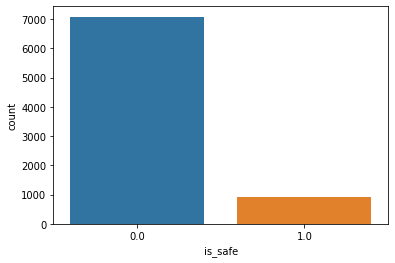

In [12]:
sns.countplot(df['is_safe'])
plt.show()

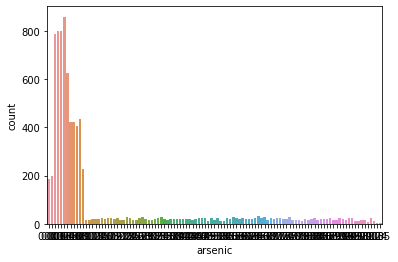

In [13]:
sns.countplot(df['arsenic'])
plt.show()

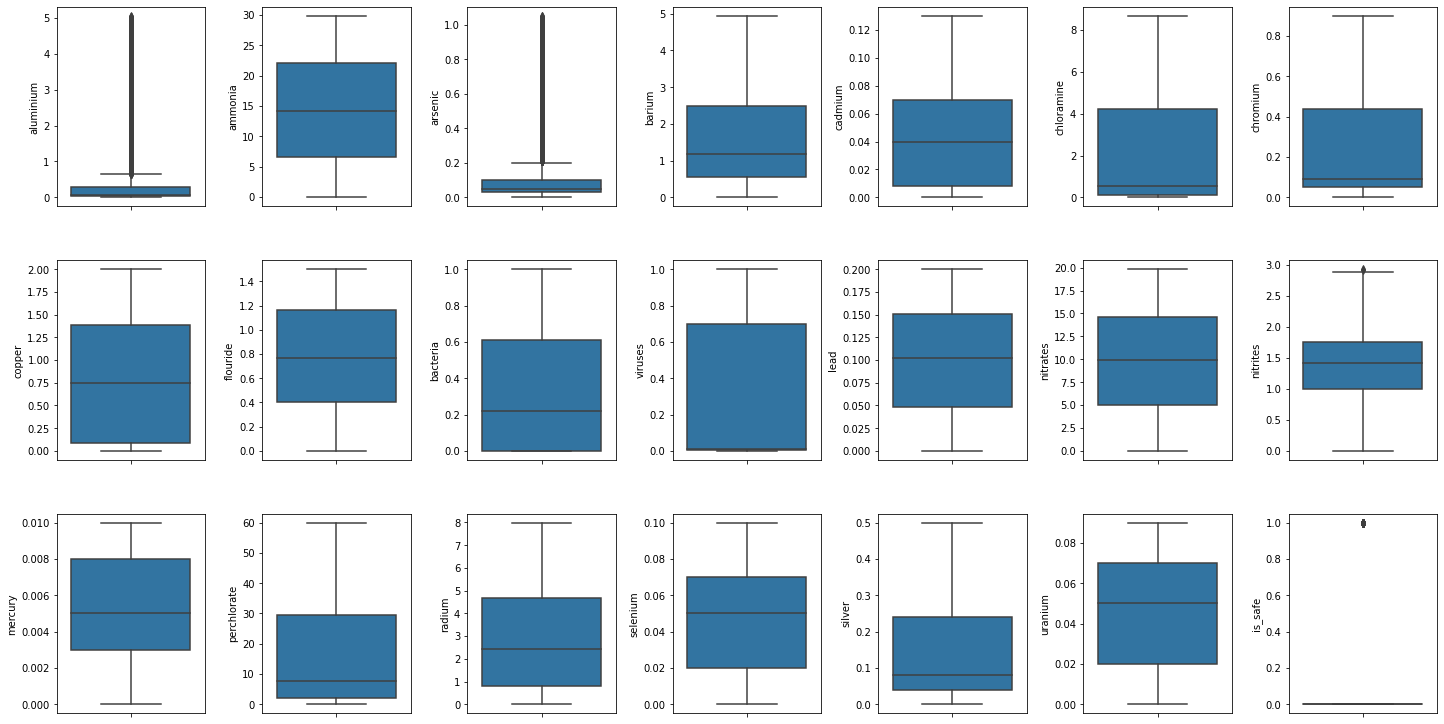

In [14]:
#box plot
fig, ax = plt.subplots(ncols=7, nrows=3, figsize=(20,10))
count = 0
ax = ax.flatten()
for i, value in df.items():
     sns.boxplot(y = i, data=df, ax=ax[count])
     count += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)      

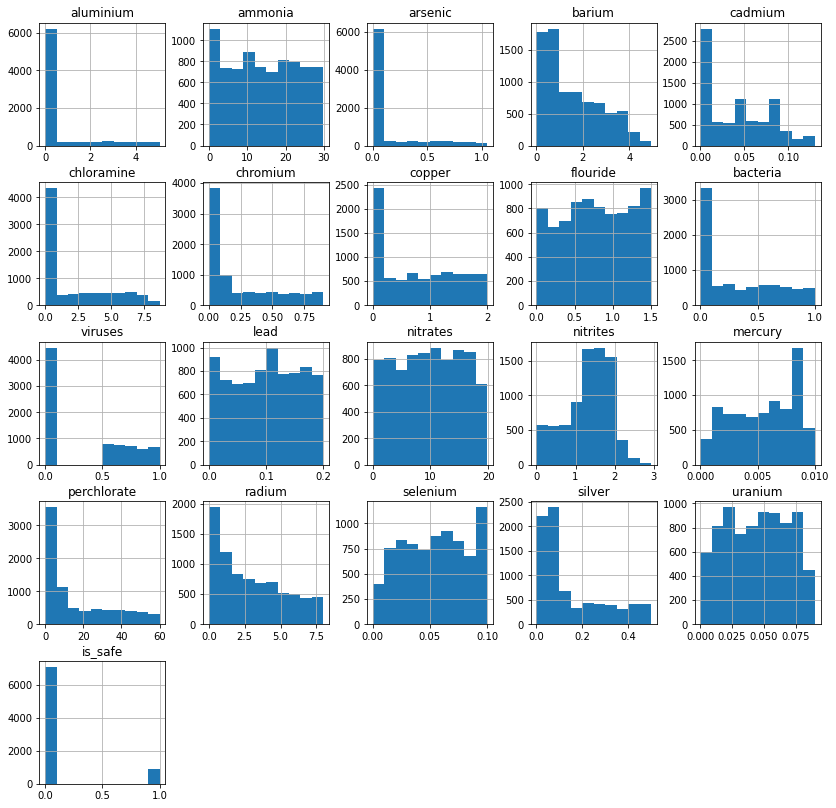

In [15]:
#distribution of the data
df.hist(figsize=(14, 14))
plt.show()

In [16]:
#coorelation matrix

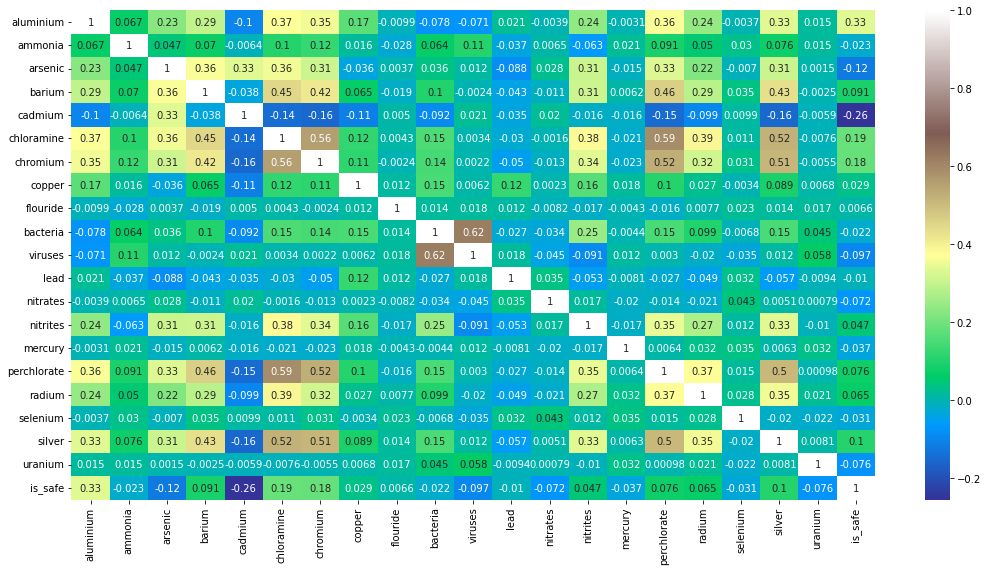

In [17]:
plt.figure(figsize=(18, 9))
sns.heatmap(df.corr(), annot=True, cmap='terrain')
plt.show()

In [18]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [19]:
y.value_counts()

0.0    7084
1.0     912
Name: is_safe, dtype: int64

In [20]:
#from imblearn.over_sampling import RandomOverSampler

In [21]:
#over_sampling
#over_sample = RandomOverSampler(random_state=100)
#x, y =over_sample.fit_resample(x,y)
#from imblearn.under_sampling import RandomUnderSampler
#under_sample = RandomUnderSampler(random_state=100)
#x, y = under_sample.fit_resample(x,y)
#y.value_counts()

In [22]:
from imblearn.under_sampling import NearMiss

In [23]:
nm = NearMiss()
x_resample, y_resample = nm.fit_resample(x, y)

In [24]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_resample)))

Original dataset shape Counter({0.0: 7084, 1.0: 912})
Resampled dataset shape Counter({0.0: 912, 1.0: 912})


In [25]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, cross_val_score

In [26]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 2)

In [27]:
xtrain.shape

(6396, 20)

In [28]:
xtest.shape

(1600, 20)

In [29]:
ytest.shape

(1600,)

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

In [31]:
#classify function
def classify(model):
    model.fit(xtrain, ytrain)
    print("The accuracy of this model is: ", model.score(xtest, ytest)*100)
    predict = model.predict(xtest)
    print(classification_report(ytest, predict))

In [32]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier()
classify(clf)

The accuracy of this model is:  95.875
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98      1439
         1.0       0.85      0.71      0.78       161

    accuracy                           0.96      1600
   macro avg       0.91      0.85      0.88      1600
weighted avg       0.96      0.96      0.96      1600



Gradient Boosting Classifier Confusion Matrix


<AxesSubplot:>

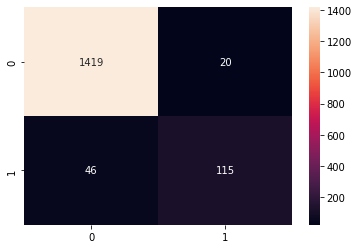

In [33]:
print('Gradient Boosting Classifier Confusion Matrix')
y_pred = clf.predict(xtest)

cm = confusion_matrix(ytest, y_pred)
sns.heatmap(cm,annot=True, fmt = 'g')

In [34]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators=200, criterion='gini', min_samples_split=5, min_samples_leaf=2, max_features='auto', bootstrap=True, n_jobs=-1, random_state=42)
rfcl.fit(xtrain, ytrain)

RandomForestClassifier(min_samples_leaf=2, min_samples_split=5,
                       n_estimators=200, n_jobs=-1, random_state=42)

In [35]:
predict_rfcl = rfcl.predict(xtest)
print(classification_report(ytest, predict_rfcl))

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98      1439
         1.0       0.88      0.66      0.76       161

    accuracy                           0.96      1600
   macro avg       0.92      0.83      0.87      1600
weighted avg       0.95      0.96      0.95      1600



Random Forest Confusion Matrix


<AxesSubplot:>

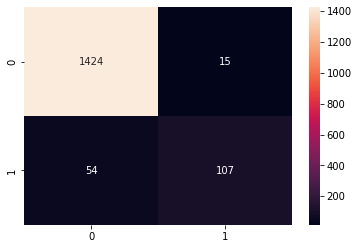

In [36]:
print('Random Forest Confusion Matrix')
y_pred = rfcl.predict(xtest)

cm = confusion_matrix(ytest, y_pred)
sns.heatmap(cm,annot=True, fmt = 'g')

In [37]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
bag_dt = BaggingClassifier(base_estimator=dt, n_estimators=100, bootstrap=True)
bag_dt.fit(xtrain, ytrain)
#classify(bag_dt)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100)

In [38]:
predict_dt = bag_dt.predict(xtest)
print(classification_report(ytest, predict_dt))

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98      1439
         1.0       0.87      0.80      0.83       161

    accuracy                           0.97      1600
   macro avg       0.92      0.89      0.91      1600
weighted avg       0.97      0.97      0.97      1600



Decision Tree Confusion Matrix


<AxesSubplot:>

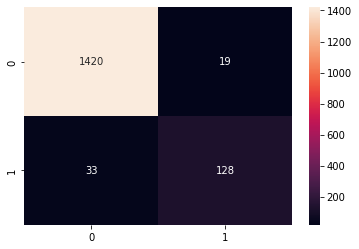

In [39]:
print('Decision Tree Confusion Matrix')
y_pred = bag_dt.predict(xtest)

cm = confusion_matrix(ytest, y_pred)
sns.heatmap(cm, annot=True, fmt = 'g')

In [40]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, 
                             min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, 
                             min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
dtc.fit(xtrain, ytrain)

DecisionTreeClassifier()

In [41]:
predict_dtc = rfcl.predict(xtest)
print(classification_report(ytest, predict_dtc))

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98      1439
         1.0       0.88      0.66      0.76       161

    accuracy                           0.96      1600
   macro avg       0.92      0.83      0.87      1600
weighted avg       0.95      0.96      0.95      1600



In [42]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
classify(ada)

The accuracy of this model is:  93.8125
              precision    recall  f1-score   support

         0.0       0.95      0.98      0.97      1439
         1.0       0.76      0.57      0.65       161

    accuracy                           0.94      1600
   macro avg       0.86      0.77      0.81      1600
weighted avg       0.93      0.94      0.93      1600



Adaboost Confusion Matrix


<AxesSubplot:>

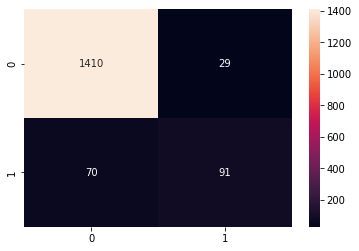

In [43]:
print('Adaboost Confusion Matrix')
y_pred = ada.predict(xtest)

cm = confusion_matrix(ytest, y_pred)
sns.heatmap(cm, annot=True, fmt = 'g')

In [44]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(xtrain, ytrain)
#classify(xgb)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [45]:
predict_xgb = xgb.predict(xtest)
print(classification_report(ytest, predict_xgb))

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      1439
         1.0       0.89      0.84      0.87       161

    accuracy                           0.97      1600
   macro avg       0.94      0.92      0.93      1600
weighted avg       0.97      0.97      0.97      1600



XGB Boost Confusion Matrix


<AxesSubplot:>

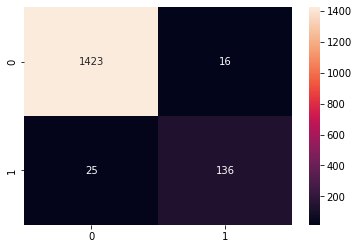

In [46]:
print('XGB Boost Confusion Matrix')
y_pred = xgb.predict(xtest)

cm = confusion_matrix(ytest, y_pred)
sns.heatmap(cm, annot=True, fmt = 'g')

In [47]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier()
lgbm.fit(xtrain, ytrain)


LGBMClassifier()

In [48]:
predict_lgbm = lgbm.predict(xtest)
print(classification_report(ytest, predict_lgbm))

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      1439
         1.0       0.90      0.86      0.88       161

    accuracy                           0.98      1600
   macro avg       0.94      0.93      0.93      1600
weighted avg       0.98      0.98      0.98      1600



LGBM Classifier Confusion Matrix


<AxesSubplot:>

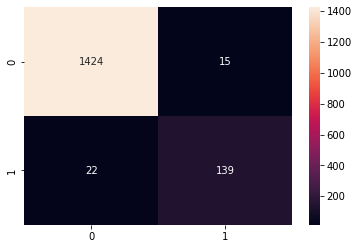

In [49]:
print('LGBM Classifier Confusion Matrix')
y_pred = lgbm.predict(xtest)

cm = confusion_matrix(ytest, y_pred)
sns.heatmap(cm, annot=True, fmt = 'g')

In [50]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

In [51]:
#ROC Curve for models

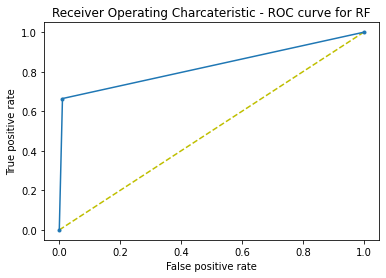

In [52]:
#random forest
y_preds = rfcl.predict(xtest).ravel()

rfcl_fpr, rfcl_tpr, thresholds = roc_curve(ytest, y_preds)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'y--')
plt.plot(rfcl_fpr, rfcl_tpr, marker='.')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver Operating Charcateristic - ROC curve for RF')
plt.show()


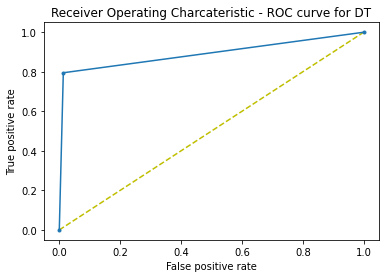

In [53]:
#decision tree
y_preds = bag_dt.predict(xtest).ravel()

dt_fpr, dt_tpr, thresholds = roc_curve(ytest, y_preds)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'y--')
plt.plot(dt_fpr, dt_tpr, marker='.')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver Operating Charcateristic - ROC curve for DT')
plt.show()

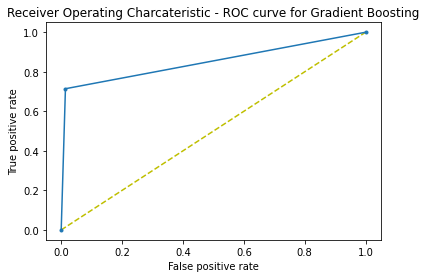

In [54]:
#Gradient Boosting Classifier
y_preds = clf.predict(xtest).ravel()

clf_fpr, clf_tpr, thresholds = roc_curve(ytest, y_preds)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'y--')
plt.plot(clf_fpr, clf_tpr, marker='.')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver Operating Charcateristic - ROC curve for Gradient Boosting')
plt.show()

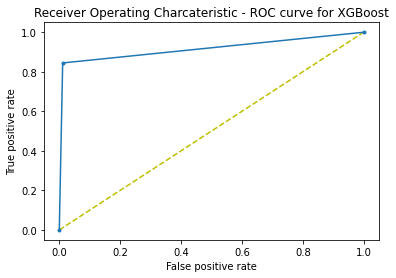

In [55]:
#xgboost
y_preds = xgb.predict(xtest).ravel()

xgb_fpr, xgb_tpr, thresholds = roc_curve(ytest, y_preds)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'y--')
plt.plot(xgb_fpr, xgb_tpr, marker='.')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver Operating Charcateristic - ROC curve for XGBoost')
plt.show()

In [56]:
#plot roc and and compare auc (area under curve)

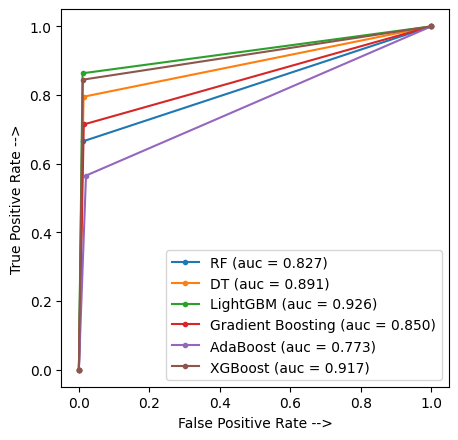

In [57]:
#random forest
y_pred_rfcl = rfcl.predict(xtest).ravel()
rfcl_fpr, rfcl_tpr, threshold = roc_curve(ytest, y_pred_rfcl)
auc_rfcl = auc(rfcl_fpr, rfcl_tpr)
#decision tree
y_pred_dt = bag_dt.predict(xtest).ravel()
dt_fpr, dt_tpr, threshold = roc_curve(ytest, y_pred_dt)
auc_dt = auc(dt_fpr, dt_tpr)
#lightgbm
y_pred_lgbm = lgbm.predict(xtest).ravel()
lgbm_fpr, lgbm_tpr, threshold = roc_curve(ytest, y_pred_lgbm)
auc_lgbm = auc(lgbm_fpr, lgbm_tpr)
#adaboost
y_pred_ada = ada.predict(xtest).ravel()
ada_fpr, ada_tpr, threshold = roc_curve(ytest, y_pred_ada)
auc_ada = auc(ada_fpr, ada_tpr)
#xgboost
y_pred_xgb = xgb.predict(xtest).ravel()
xgb_fpr, xgb_tpr, threshold = roc_curve(ytest, y_pred_xgb)
auc_xgb = auc(xgb_fpr, xgb_tpr)
#gradient boosting
y_pred_clf = clf.predict(xtest).ravel()
clf_fpr, clf_tpr, threshold = roc_curve(ytest, y_pred_clf)
auc_clf = auc(clf_fpr, clf_tpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(rfcl_fpr, rfcl_tpr, marker='.', label='RF (auc = %0.3f)' % auc_rfcl)
plt.plot(dt_fpr, dt_tpr, marker='.', label='DT (auc = %0.3f)' % auc_dt)
plt.plot(lgbm_fpr, lgbm_tpr, marker='.', label='LightGBM (auc = %0.3f)' % auc_lgbm)
plt.plot(clf_fpr, clf_tpr, marker='.', label='Gradient Boosting (auc = %0.3f)' % auc_clf)
plt.plot(ada_fpr, ada_tpr, marker='.', label='AdaBoost (auc = %0.3f)' % auc_ada)
plt.plot(xgb_fpr, xgb_tpr, marker='.', label='XGBoost (auc = %0.3f)' % auc_xgb)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()

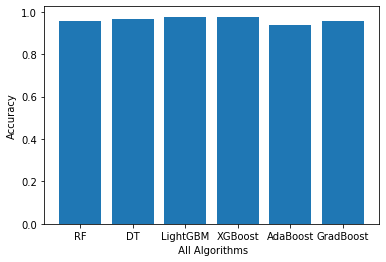

In [58]:
plt.bar(['RF','DT', 'LightGBM', 'XGBoost', 'AdaBoost', 'GradBoost'],[rfcl.score(xtest, ytest), bag_dt.score(xtest, ytest), lgbm.score(xtest, ytest), xgb.score(xtest, ytest), ada.score(xtest, ytest), clf.score(xtest, ytest)])
plt.xlabel(" All Algorithms")
plt.ylabel("Accuracy")
plt.show()